Side Note: the BERT Model Card can be found at  https://huggingface.co/bert-base-uncased

First we will need to install the Transformers Library, which is also from HuggingFace, this can be done with a simple pip command.

In [ ]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 51.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 92.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 22.7 MB/s eta 0:00:00


In [ ]:
pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 KB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 KB 26.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 16.5 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf

In [ ]:
import tensorflow_datasets as tfdata

There are two ways to work with models that have reached mainstream adoption: Tensorflow (Keras) and PyTorch. Here we are working with the Tensorflow Library

In [ ]:
from transformers import BertTokenizer, TFBertModel
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = TFBertModel.from_pretrained("bert-base-uncased")
text = "Replace me by any text you'd like." #change this if you want to see a different output!
encoded_input = tokenizer(text, return_tensors='tf')
output = model(encoded_input)

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


An example of the sentence "Replace me by any text you'd like" - feel free to change it. What you should NOT change however, is the Tokenizer. The tokenizer comes with the model and it should only be used with that model. Keep that in mind while trying out other models.

In [ ]:
output

TFBaseModelOutputWithPoolingAndCrossAttentions(last_hidden_state=<tf.Tensor: shape=(1, 12, 768), dtype=float32, numpy=
array([[[ 0.13871546,  0.15825662, -0.29699188, ..., -0.27036548,
         -0.28439468,  0.4578122 ],
        [ 0.53687984, -0.23298709,  0.17540604, ...,  0.5545705 ,
          0.49828747, -0.00224124],
        [ 0.30028492, -0.34752145,  0.12078432, ..., -0.45572907,
          0.3285413 ,  0.87741655],
        ...,
        [ 0.38045487,  0.12035119,  0.82856995, ..., -0.8627312 ,
         -0.5952204 ,  0.04663449],
        [-0.02505059, -0.71751815, -0.69520533, ...,  0.07620818,
         -0.66668653, -0.339958  ],
        [ 0.75341094,  0.23900357,  0.07204142, ...,  0.2466754 ,
         -0.6457954 , -0.32167816]]], dtype=float32)>, pooler_output=<tf.Tensor: shape=(1, 768), dtype=float32, numpy=
array([[-9.37641323e-01, -5.04176080e-01, -9.79888678e-01,
         9.02986348e-01,  9.32965636e-01, -2.43651360e-01,
         8.92496407e-01,  2.28719071e-01, -9.53093231e-

We have to specify the path to the data


In [ ]:
PATH = '/content/archive.zip'

Feel free to change the path for the zipfile.

In [ ]:
import zipfile
import pandas as pd

In [ ]:
zf = zipfile.ZipFile(PATH) 
df = pd.read_csv(zf.open('mtsamples.csv'))

In [ ]:
df

,Unnamed: 0,description,medical_specialty,sample_name,transcription,keywords
0,0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller..."
1,1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh..."
2,2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart..."
3,3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo..."
...,...,...,...,...,...,...
4994,4994,Patient having severe sinusitis about two to ...,Allergy / Immunology,Chronic Sinusitis,"HISTORY:, I had the pleasure of meeting and e...",NaN
4995,4995,This is a 14-month-old baby boy Caucasian who...,Allergy / Immunology,Kawasaki Disease - Discharge Summary,"ADMITTING DIAGNOSIS: , Kawasaki disease.,DISCH...","allergy / immunology, mucous membranes, conjun..."
4996,4996,A female for a complete physical and follow u...,Allergy / Immunology,Followup on Asthma,"SUBJECTIVE: , This is a 42-year-old white fema...",NaN
4997,4997,Mother states he has been wheezing and coughing.,Allergy / Immunology,Asthma in a 5-year-old,"CHIEF COMPLAINT: , This 5-year-old male presen...",NaN


When we look at the data more clearly, we can see different labels: What we would like to do now is to get the transcription to map to the medical_specialty. We want to finetune the BERT Model with the data we have obtained from Kaggle to predict the category for us. 

[Text(0, 0, ' Allergy / Immunology'),
 Text(1, 0, ' Bariatrics'),
 Text(2, 0, ' Cardiovascular / Pulmonary'),
 Text(3, 0, ' Neurology'),
 Text(4, 0, ' Dentistry'),
 Text(5, 0, ' Urology'),
 Text(6, 0, ' General Medicine'),
 Text(7, 0, ' Surgery'),
 Text(8, 0, ' Speech - Language'),
 Text(9, 0, ' SOAP / Chart / Progress Notes'),
 Text(10, 0, ' Sleep Medicine'),
 Text(11, 0, ' Rheumatology'),
 Text(12, 0, ' Radiology'),
 Text(13, 0, ' Psychiatry / Psychology'),
 Text(14, 0, ' Podiatry'),
 Text(15, 0, ' Physical Medicine - Rehab'),
 Text(16, 0, ' Pediatrics - Neonatal'),
 Text(17, 0, ' Pain Management'),
 Text(18, 0, ' Orthopedic'),
 Text(19, 0, ' Ophthalmology'),
 Text(20, 0, ' Office Notes'),
 Text(21, 0, ' Obstetrics / Gynecology'),
 Text(22, 0, ' Neurosurgery'),
 Text(23, 0, ' Nephrology'),
 Text(24, 0, ' Letters'),
 Text(25, 0, ' Lab Medicine - Pathology'),
 Text(26, 0, ' IME-QME-Work Comp etc.'),
 Text(27, 0, ' Hospice - Palliative Care'),
 Text(28, 0, ' Hematology - Oncology'),
 Te

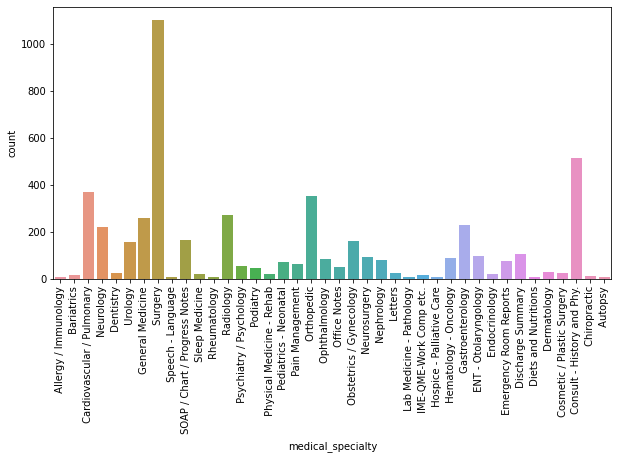

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plot = sns.countplot(data=df,
                   x= 'medical_specialty')
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['medical_specialty'] = encoder.fit_transform(df['medical_specialty'])

We changed the Medical Specialty to numbers

In [ ]:
df

,Unnamed: 0,description,medical_specialty,sample_name,transcription,keywords
0,0,A 23-year-old white female presents with comp...,0,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller..."
1,1,Consult for laparoscopic gastric bypass.,2,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh..."
2,2,Consult for laparoscopic gastric bypass.,2,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart..."
3,3,2-D M-Mode. Doppler.,3,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,4,2-D Echocardiogram,3,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo..."
...,...,...,...,...,...,...
4994,4994,Patient having severe sinusitis about two to ...,0,Chronic Sinusitis,"HISTORY:, I had the pleasure of meeting and e...",NaN
4995,4995,This is a 14-month-old baby boy Caucasian who...,0,Kawasaki Disease - Discharge Summary,"ADMITTING DIAGNOSIS: , Kawasaki disease.,DISCH...","allergy / immunology, mucous membranes, conjun..."
4996,4996,A female for a complete physical and follow u...,0,Followup on Asthma,"SUBJECTIVE: , This is a 42-year-old white fema...",NaN
4997,4997,Mother states he has been wheezing and coughing.,0,Asthma in a 5-year-old,"CHIEF COMPLAINT: , This 5-year-old male presen...",NaN


Now we have a look at the distribution of the data.
The next steps would include to put it in a different format, which is easier to handle for the ML-Part




In [ ]:
from datasets import load_dataset,DatasetDict, Dataset

In [ ]:
ds = Dataset.from_pandas(df)

In [ ]:
ds

Dataset({
    features: ['Unnamed: 0', 'description', 'medical_specialty', 'sample_name', 'transcription', 'keywords'],
    num_rows: 4999
})

In [ ]:
#dataset = load_dataset('csv', data_files=PATH, split='train')

#dataset

Here we delete the Features that we do not want to influence our training.

In [ ]:
train_test_valid = ds.train_test_split()

test_valid = train_test_valid['test'].train_test_split()

train_test_valid_dataset = DatasetDict({
    'train': train_test_valid['train'],
    'test': test_valid['test'],
    'valid': test_valid['train']
    })

dataset = train_test_valid_dataset.remove_columns(['sample_name','Unnamed: 0', 'transcription','keywords'])
#dataset = train_test_valid_dataset.remove_columns(['medical_specialty', 'sample_name','Unnamed: 0', 'transcription'])
dataset

DatasetDict({
    train: Dataset({
        features: ['description', 'medical_specialty'],
        num_rows: 3749
    })
    test: Dataset({
        features: ['description', 'medical_specialty'],
        num_rows: 313
    })
    valid: Dataset({
        features: ['description', 'medical_specialty'],
        num_rows: 937
    })
})

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [ ]:
print(f"Vocab size is : {tokenizer.vocab_size}")

print(f"Model max length is : {tokenizer.model_max_length}")

print(f"Model input names are: {tokenizer.model_input_names}")

Vocab size is : 30522
Model max length is : 512
Model input names are: ['input_ids', 'token_type_ids', 'attention_mask']


In [ ]:
ds

Dataset({
    features: ['Unnamed: 0', 'description', 'medical_specialty', 'sample_name', 'transcription', 'keywords'],
    num_rows: 4999
})

In [ ]:
def tokenize_function(train_dataset):
    return tokenizer(train_dataset['description'], padding='max_length', truncation=True)


tokenized_dataset = dataset.map(tokenize_function, batched=True)

tokenized_dataset

train_dataset = tokenized_dataset['train']
eval_dataset = tokenized_dataset['valid']
test_dataset = tokenized_dataset['test']

Map:   0%|          | 0/3749 [00:00<?, ? examples/s]

Map:   0%|          | 0/313 [00:00<?, ? examples/s]

Map:   0%|          | 0/937 [00:00<?, ? examples/s]

This split is important, as it needs 3 sets.  

*   Train
*   Test
*   Validation





In [ ]:
train_dataset

Dataset({
    features: ['description', 'medical_specialty', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 3749
})

In [ ]:
train_set = train_dataset.remove_columns(['description']).with_format('tensorflow')

tf_eval_dataset = eval_dataset.remove_columns(['description']).with_format('tensorflow')

tf_test_dataset = test_dataset.remove_columns(['description']).with_format('tensorflow')

In [ ]:
train_features = { x: train_set[x] for x in tokenizer.model_input_names  }

train_set_for_final_model = tf.data.Dataset.from_tensor_slices((train_features, train_set['medical_specialty'] ))

train_set_for_final_model = train_set_for_final_model.shuffle(len(train_set)).batch(8)


eval_features = {x: tf_eval_dataset[x] for x in tokenizer.model_input_names}
val_set_for_final_model = tf.data.Dataset.from_tensor_slices((eval_features, tf_eval_dataset['medical_specialty']))
val_set_for_final_model = val_set_for_final_model.batch(8)

test_features = {x: tf_test_dataset[x] for x in tokenizer.model_input_names}
test_set_for_final_model = tf.data.Dataset.from_tensor_slices((test_features, tf_test_dataset['medical_specialty']))
test_set_for_final_model =test_set_for_final_model.batch(8)

In [ ]:
from transformers import AutoTokenizer,TFAutoModelForSequenceClassification

In [29]:
model = TFAutoModelForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=40)
# model = TFAutoModelForSequenceClassification.from_pretrained("/mnt/e0ccdbdb-22c3-4d9b-9413-fd976a2e99ae/M1/Code_Org/HF_Models/bert-base-uncased", num_labels=3)


model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=5e-5),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=tf.metrics.SparseCategoricalAccuracy(),
)

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Time for us to train

In [30]:
history = model.fit(train_set_for_final_model, validation_data=val_set_for_final_model, epochs=5)

Epoch 1/5
469/469 [==============================] - 125s 165ms/step - loss: 2.6583 - sparse_categorical_accuracy: 0.2953 - val_loss: 2.3021 - val_sparse_categorical_accuracy: 0.3351
Epoch 2/5
469/469 [==============================] - 66s 141ms/step - loss: 2.1227 - sparse_categorical_accuracy: 0.3534 - val_loss: 1.9798 - val_sparse_categorical_accuracy: 0.3501
Epoch 3/5
469/469 [==============================] - 66s 141ms/step - loss: 1.7920 - sparse_categorical_accuracy: 0.3926 - val_loss: 1.9429 - val_sparse_categorical_accuracy: 0.3127
Epoch 4/5
469/469 [==============================] - 66s 140ms/step - loss: 1.5887 - sparse_categorical_accuracy: 0.4172 - val_loss: 2.0092 - val_sparse_categorical_accuracy: 0.2807
Epoch 5/5
469/469 [==============================] - 66s 140ms/step - loss: 1.4386 - sparse_categorical_accuracy: 0.4190 - val_loss: 1.9820 - val_sparse_categorical_accuracy: 0.2540


As mentioned before, the model is not that accurate, but in next steps we could try to generate new data points by training on the old ones and maybe factoring in also the keywords. 

*   Train on less categories
*   Generate new data per category
*   Get more data to generate more points/category from other medical datasets and or wikipedia to get more data.



In [32]:
import numpy as np

In [44]:
predict_score_and_class_dict = {0: ' Allergy / Immunology', 1: ' Bariatrics', 2: ' Cardiovascular / Pulmonary', 3: ' Neurology', 4: ' Dentistry', 5: ' Urology', 6: ' General Medicine', 7: ' Surgery', 8: ' Speech - Language', 9: ' SOAP / Chart / Progress Notes', 10: ' Sleep Medicine', 11: ' Rheumatology', 12: ' Radiology', 13: ' Psychiatry / Psychology', 14: ' Podiatry', 15: ' Physical Medicine - Rehab', 16: ' Pediatrics - Neonatal', 17: ' Pain Management', 18: ' Orthopedic', 19: ' Ophthalmology', 20: ' Office Notes', 21: ' Obstetrics / Gynecology', 22: ' Neurosurgery', 23: ' Nephrology', 24: ' Letters', 25: ' Lab Medicine - Pathology', 26: ' IME-QME-Work Comp etc.', 27: ' Hospice - Palliative Care', 28: ' Hematology - Oncology', 29: ' Gastroenterology', 30: ' ENT - Otolaryngology', 31: ' Endocrinology', 32: ' Emergency Room Reports', 33: ' Discharge Summary', 34: ' Diets and Nutritions', 35: ' Dermatology', 36: ' Cosmetic / Plastic Surgery', 37: ' Consult - History and Phy.', 38: ' Chiropractic', 39: ' Autopsy'}

preds = model(tokenizer(["14 year old boy, trouble breathing, asthma"],return_tensors="tf",padding=True,truncation=True))['logits']

print(preds)

class_preds = np.argmax(preds, axis=1)

for pred in class_preds:
  print(predict_score_and_class_dict[pred])

tf.Tensor(
[[ 7.8269660e-01  2.0586133e-02 -1.2119799e+00  3.1674702e+00
  -2.3513272e+00  3.4068594e+00 -1.2992792e+00 -1.7990235e+00
  -4.9186009e-01 -1.8046331e+00  3.2746463e+00  1.1109754e+00
   3.4115248e+00  8.1709668e-02  6.3674039e-01  3.0859532e+00
  -3.1041843e-03 -2.1184378e+00 -2.1434674e+00 -1.8840517e+00
  -2.0328312e+00 -1.0284294e+00 -7.2629625e-01 -1.8761051e+00
  -3.6056742e-01  9.8858666e-01 -1.7632463e+00 -1.5262622e+00
  -2.9099028e+00  3.1219518e+00 -1.9877642e+00 -1.2213217e+00
  -4.8710623e-01 -8.7183535e-01 -1.6263224e+00  4.5898068e-01
  -1.3389231e+00 -1.2813189e+00  8.0507624e-01 -1.2063051e+00]], shape=(1, 40), dtype=float32)
 Radiology
